In [10]:
import os
import sys

sys.path.append(os.path.abspath(os.path.join('..', 'scripts')))

In [5]:
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
import numpy as np


In [8]:
# Load the cleaned xdr data into a DataFrame
data = pd.read_csv('../Data/data/Week2_challenge_data_source(CSV).csv', index_col=0)

In [9]:
data.head()

,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
Bearer Id,,,,,,,,,,,,,,,,,,,,,
1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,42.0,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,65.0,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,NaN,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,NaN,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,NaN,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [11]:
from user_engagement_analysis import UserEngagementAnalysis
# Create an instance of the class
analysis = UserEngagementAnalysis(data)

# Define application traffic columns
applications = {
    'YouTube': ['Youtube DL (Bytes)', 'Youtube UL (Bytes)'],
    'Netflix': ['Netflix DL (Bytes)', 'Netflix UL (Bytes)'],
    'Gaming': ['Gaming DL (Bytes)', 'Gaming UL (Bytes)'],
    'Other': ['Other DL (Bytes)', 'Other UL (Bytes)']
}
# Initialize the analysis class
analysis = UserEngagementAnalysis(data)

# Aggregate metrics
analysis.aggregate_metrics()
analysis.metrics.head()

,MSISDN/Number,total_session_duration,total_download_traffic,total_upload_traffic,sessions_frequency
0,3.360100e+10,116720.0,8.426375e+08,36053108.0,1
1,3.360100e+10,181230.0,1.207552e+08,36104459.0,1
2,3.360100e+10,134969.0,5.566597e+08,39306820.0,1
3,3.360101e+10,49878.0,4.019932e+08,20327526.0,1
4,3.360101e+10,37104.0,1.363130e+09,94280527.0,2


In [12]:
# Report top customers
top_customers = analysis.report_top_customers()
print("Top 10 Customers by Sessions Frequency:", top_customers[0])
print("Top 10 Customers by Session Duration:", top_customers[1])
print("Top 10 Customers by Download Traffic:", top_customers[2])
print("Top 10 Customers by Upload Traffic:", top_customers[3])

Top 10 Customers by Sessions Frequency:        MSISDN/Number  total_session_duration  total_download_traffic  \
13526   3.362632e+10               8791927.0            7.301517e+09   
6437    3.361489e+10               9966898.0            8.156743e+09   
13180   3.362578e+10              18553754.0            7.770043e+09   
37052   3.365973e+10               4035428.0            7.081602e+09   
76363   3.367588e+10               4865947.0            7.309542e+09   
92923   3.376054e+10               9279434.0            7.811295e+09   
65118   3.366716e+10               8744914.0            5.052068e+09   
666     3.360313e+10               6287761.0            4.540607e+09   
1279    3.360452e+10               5207990.0            5.096079e+09   
13994   3.362708e+10               4703516.0            5.309479e+09   

       total_upload_traffic  sessions_frequency  
13526           669650721.0                  18  
6437            689483001.0                  17  
13180           7

In [13]:
# Normalize and cluster
analysis.normalize_and_cluster(n_clusters=3)
print(analysis.metrics.head())

   MSISDN/Number  total_session_duration  total_download_traffic  \
0   3.360100e+10                116720.0            8.426375e+08   
1   3.360100e+10                181230.0            1.207552e+08   
2   3.360100e+10                134969.0            5.566597e+08   
3   3.360101e+10                 49878.0            4.019932e+08   
4   3.360101e+10                 37104.0            1.363130e+09   

   total_upload_traffic  sessions_frequency  cluster  
0            36053108.0                   1        1  
1            36104459.0                   1        1  
2            39306820.0                   1        1  
3            20327526.0                   1        1  
4            94280527.0                   2        0  


In [14]:
# Cluster summary
cluster_summary = analysis.cluster_summary()
cluster_summary

cluster sessions_frequency                      total_session_duration  \
                         min max      mean    sum                    min   
0       0                  1   4  2.164352  53308                18235.0   
1       1                  1   2  1.011050  79420                 7142.0   
2       2                  2  18  4.411268  16207                66594.0   

                                           total_download_traffic  \
          max           mean           sum                    min   
0   1573420.0  209733.014738  5.165724e+09             65270746.0   
1   1042254.0  103284.036905  8.113168e+09              8827082.0   
2  18553754.0  636893.259662  2.339946e+09            404647470.0   

                                            total_upload_traffic               \
            max          mean           sum                  min          max   
0  2.409217e+09  9.892445e+08  2.436509e+13           23034394.0  197644172.0   
1  9.678157e+08  4.548535e+08  3.572965e+13            2866892.0   93422615.0   
2  8.156743e+09  2.072631e+09  7.614845e+12           68496905.0  729577380.0   

                               
           mean           sum  
0  8.945364e+07  2.203243e+12  
1  4.134366e+07  3.247627e+12  
2  1.831752e+08  6.729856e+11

In [15]:

# Aggregate traffic per application
app_total_traffic, top_10_engaged_per_app = analysis.aggregate_traffic_per_application(applications=applications)
print("Total Traffic per Application:", app_total_traffic)
print("Top 10 Engaged Users per Application:", top_10_engaged_per_app)

Total Traffic per Application:   application  download_bytes  upload_bytes   total_bytes
0      Gaming    6.285438e+13  1.234535e+12  6.408892e+13
1     Netflix    1.731750e+12  1.638310e+12  3.370060e+12
2       Other    6.272357e+13  1.230678e+12  6.395425e+13
3     YouTube    1.732628e+12  1.639576e+12  3.372204e+12
Top 10 Engaged Users per Application:           MSISDN  download_bytes  upload_bytes application   total_bytes
0   3.361489e+10    7.622035e+09   127396833.0      Gaming  7.749432e+09
1   3.376054e+10    7.316364e+09   144681056.0      Gaming  7.461045e+09
2   3.362578e+10    7.171884e+09   154789688.0      Gaming  7.326673e+09
3   3.367588e+10    6.863307e+09   107260559.0      Gaming  6.970568e+09
4   3.362632e+10    6.745734e+09   141838597.0      Gaming  6.887572e+09
5   3.365973e+10    6.609900e+09   115658741.0      Gaming  6.725559e+09
6   3.366646e+10    6.546328e+09    99975537.0      Gaming  6.646303e+09
7   3.376041e+10    6.170943e+09    97676681.0      Gamin

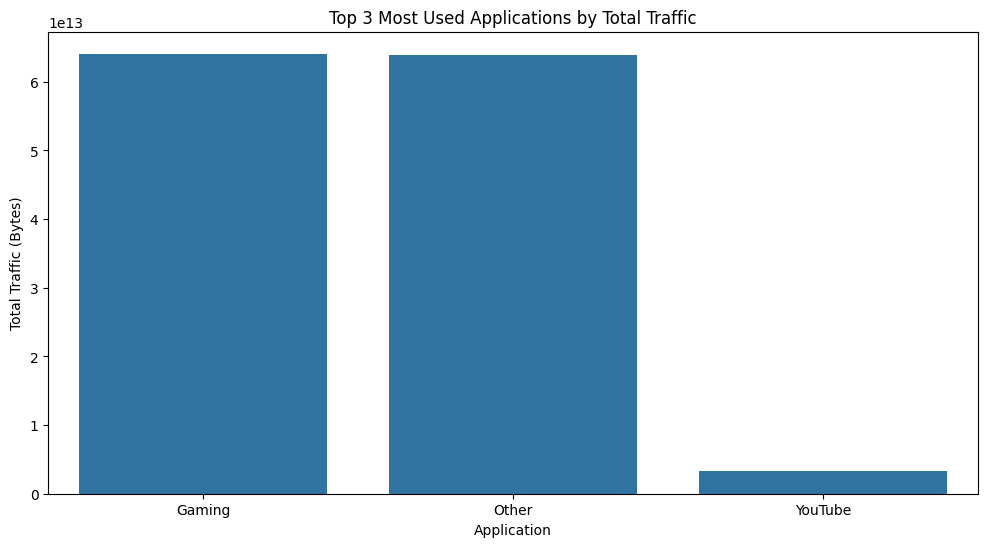

In [16]:
# Plot top applications 
top_3_apps = app_total_traffic.nlargest(3, 'total_bytes')
analysis.plot_top_applications(top_3_apps)

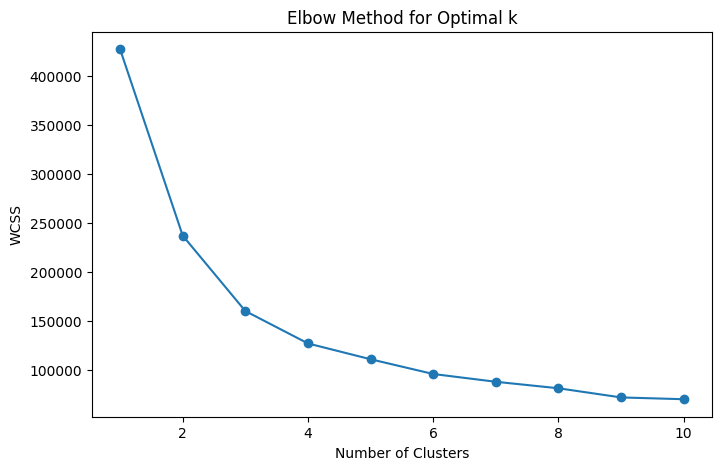

In [17]:
# Elbow method for determining optimal number of clusters
analysis.elbow_method()